In [1]:
# ARIMA used for short term forecast

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import pandas as pd
import pytz

import pyflux as pf
from pandas.plotting import autocorrelation_plot
from datetime import datetime, timedelta

import modules.dataframe_manip as dp
from IPython.display import display, clear_output
import ipywidgets as widgets

In [2]:
# CHANGABLE VARIABLES
filename = 'wifi_data_until_20190204.csv'
building_name = 'ALEXANDER' # use ALL for all buildings

# CONST VARIABLES
building_list = [
    ' POMONA','118-8TH','1567TH','345C','ALEXANDER','ANDREW','BALDWIN',
    'BRACKETT','BRIDGES','CARNEGIE','CLARK3','CLARKI','CLARKV',
    'CROOKSHANK','DRAPER', 'FARM', 'FRANK', 'FRARY', 'GIBONEY',
    'GIBSON', 'GROUNDS', 'HAHN', 'HALDEMAN','HARWOOD','ITB',
    'KENYON', 'LAWRY', 'LEB', 'LEBUS', 'MASON', 'MCCARTHY', 'MERRIT',
    'MILLIKAN', 'MUSEUM', 'NORTON', 'OLDENBORG','PAULEY','PEARSON',
    'PENDLETON','POMONA','RAINS','REMBRANDT', 'SCC', 'SEAVER','SGM',
    'SMILEY','SMITH','SONTAG','STUDIOART','SUMNER','THATCHER','WALKER',
    'WALTON','WIG']

In [3]:
data = dp.csv_to_timeseries_df(
    filepath=filename,
    timezone=pytz.timezone('US/Pacific'))

In [4]:
w = widgets.Dropdown(
    options=building_list,
    value = building_list[0],
    description='List',
)

In [5]:
def arima_forecasting(change):
    if change['name'] == 'value' and (change['new'] != change['old']):
        clear_output()
        display(w)
        
        building = data[dp.get_building_accesspoints(data, change['new'])].copy()
        building.index = building.index
        building['y'] = building.sum(axis=1)
        building = building.resample('D').mean()
        new_df = pd.DataFrame()
        new_df['average_connected_devices'] = building['y']
        new_df.index = building.index
        model = pf.ARIMA(data=new_df, ar=4, ma=4, target='average_connected_devices', family=pf.Normal())
        x = model.fit("MLE")
        model.plot_fit(figsize=(15,10))

Dropdown(description='List', index=14, options=(' POMONA', '118-8TH', '1567TH', '345C', 'ALEXANDER', 'ANDREW',…

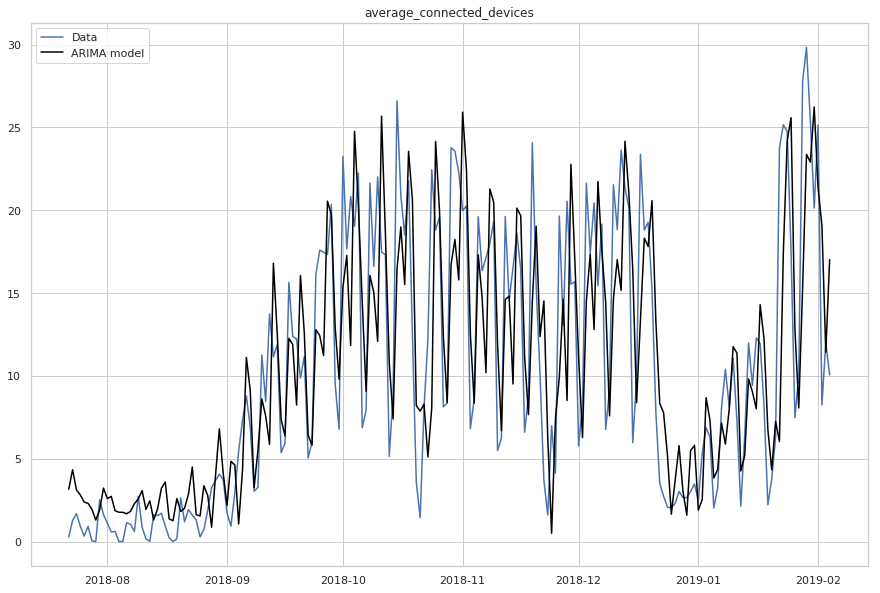

In [6]:
display(w)
w.observe(arima_forecasting)